In [248]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

import keras as kr
from keras import backend as K
from keras.utils import np_utils
from keras import utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization

In [249]:
data = np.load("olivetti_faces.npy")
target = np.load("olivetti_faces_target.npy")

In [250]:
print(data.shape)
print(target.shape)

(400, 64, 64)
(400,)


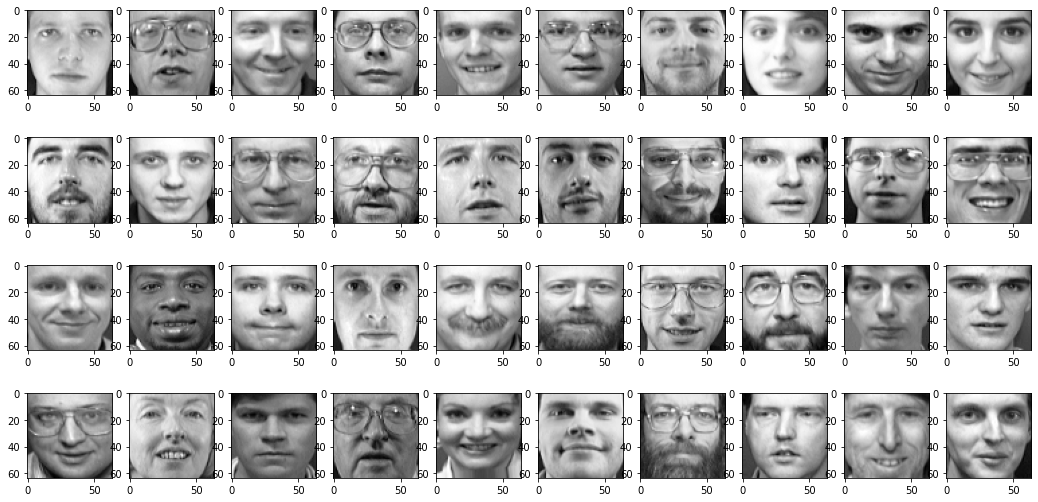

In [251]:
def show_40_distinct_people(imgs, unique_ids):
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))

    axarr = axarr.flatten()

    for id in unique_ids:
        img_id = id * 10
        axarr[id].imshow(imgs[img_id], cmap='gray')

show_40_distinct_people(data, np.unique(target))

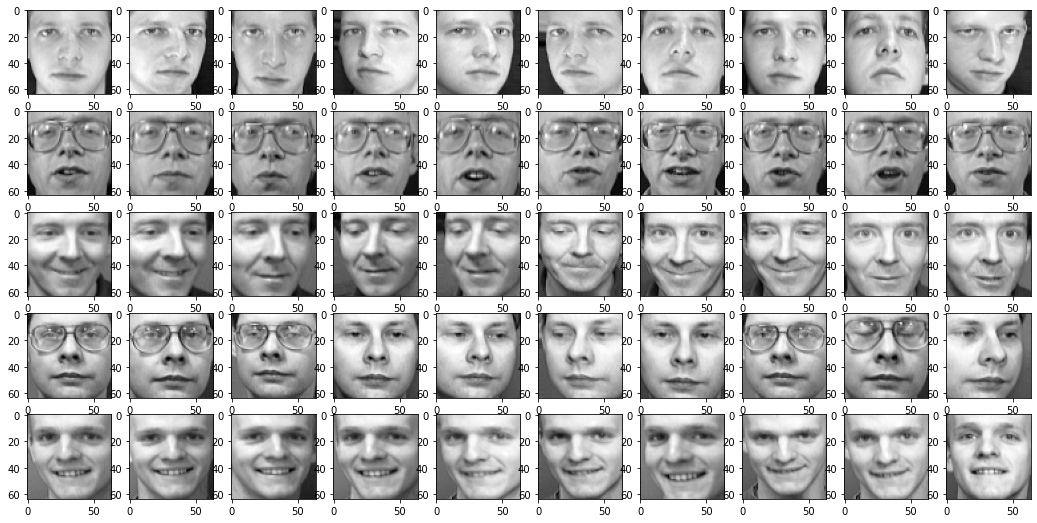

In [252]:
def show_10_faces_of_n_subject(imgs, subject_ids):
    cols = 10
    rows = (len(subject_ids)*10)//cols

    fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))

    for i, subject_ids in enumerate(subject_ids):
        for j in range(cols):
            img_id = subject_ids*10 + j
            axarr[i, j].imshow(imgs[img_id], cmap='gray')

show_10_faces_of_n_subject(data, subject_ids=[0, 1, 2, 3, 4])

In [253]:
target = np_utils.to_categorical(target, len(np.unique(target)))

X_train, X_test, Y_train, Y_test = train_test_split(data, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state= 0)

In [254]:
target.shape

(400, 40)

In [255]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

In [256]:
X_train.shape

(320, 64, 64, 1)

In [257]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [263]:
# model creating
num_classes = 40

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                 activation='relu', input_shape=(64, 64, 1)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                 activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=40, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])

print(model.summary())

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 64, 64, 32)        832       
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 64, 64, 32)        25632     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 16, 16, 64)      

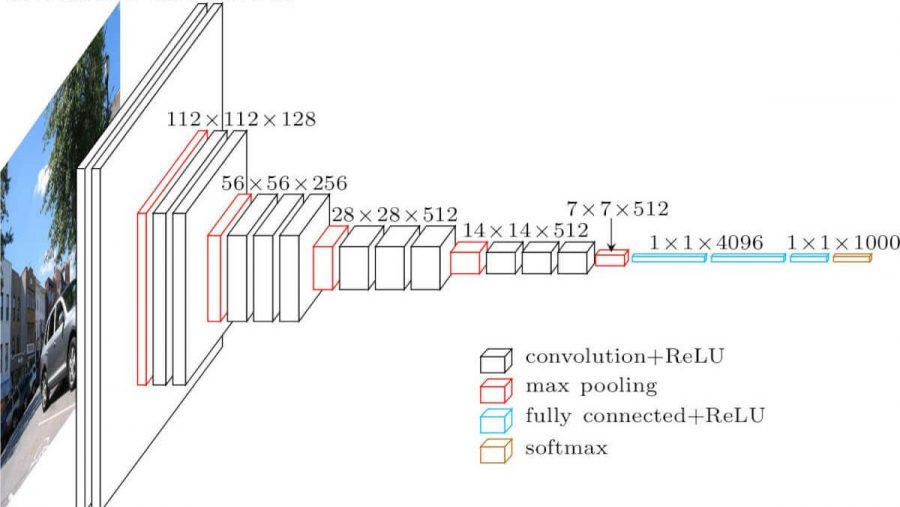

In [264]:
history = model.fit(X_train, 
                    Y_train, 
                    validation_data=(X_test, Y_test), 
                    batch_size=32, 
                    epochs=30, 
                    verbose=1)

Epoch 1/30
10/10 [==============================] - 0s 40ms/step - loss: 3.7183 - accuracy: 0.0156 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 3.6907 - val_accuracy: 0.0125 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/30
10/10 [==============================] - 0s 33ms/step - loss: 3.6885 - accuracy: 0.0219 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 3.6926 - val_accuracy: 0.0125 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/30
10/10 [==============================] - 0s 25ms/step - loss: 3.6877 - accuracy: 0.0312 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 3.6945 - val_accuracy: 0.0125 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/30
10/10 [==============================] - 0s 26ms/step - loss: 3.6880 - accuracy: 0.0375 - f1_m: 0.0000e+00 - precision_m: 

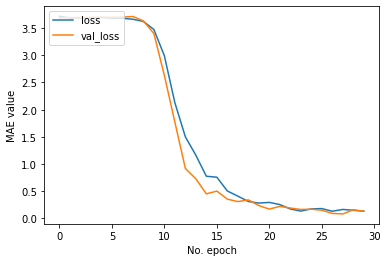

In [272]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

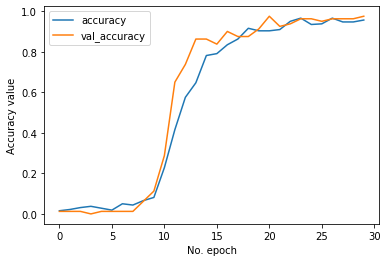

In [273]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [274]:
a = np.array([data[55]])
b = a.reshape(a.shape[0], 64, 64, 1)
model.predict(b)

array([[6.5740529e-08, 9.3205628e-08, 2.0436743e-09, 1.1370071e-06,
        5.9153476e-06, 9.9975377e-01, 9.9412929e-08, 6.9014833e-10,
        2.1386286e-06, 8.3220835e-09, 5.2691098e-07, 1.1154843e-08,
        5.0118255e-05, 1.4275156e-08, 1.0480685e-04, 3.6041038e-05,
        9.9773703e-11, 5.2589617e-06, 1.2151677e-06, 3.0755502e-05,
        7.0581244e-08, 5.0659267e-08, 1.2922432e-08, 1.8271001e-10,
        3.9001290e-07, 1.3543662e-10, 6.3345382e-09, 1.5956823e-07,
        3.5961017e-10, 2.3898410e-06, 6.5202414e-07, 2.2470825e-08,
        2.5240030e-07, 1.8098493e-09, 1.9997617e-06, 4.1962400e-07,
        1.0972346e-10, 2.3108558e-07, 1.5733912e-08, 1.3187552e-06]],
      dtype=float32)

In [279]:
image = kr.preprocessing.image.load_img('фото.jpg',
                                        grayscale=True,
                                        color_mode='grayscale')
input_arr = kr.preprocessing.image.img_to_array(image)
input_arr.shape

(118, 114, 1)

In [280]:
input_arr = cv.resize(input_arr, dsize=(64, 64))

In [281]:
a = np.array([input_arr])
b = a.reshape(a.shape[0], 64, 64, 1)
model.predict(b)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

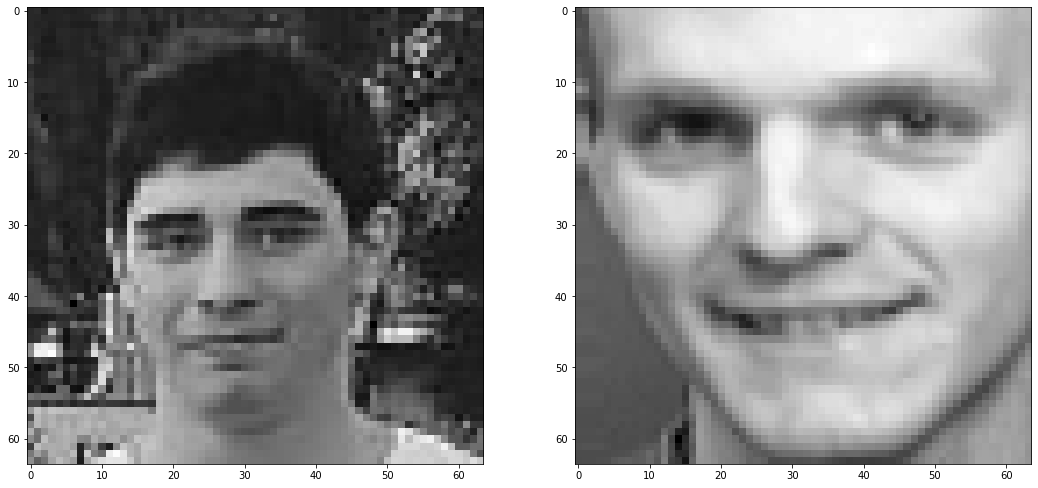

In [282]:
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))

axarr = axarr.flatten()
axarr[0].imshow(input_arr, cmap='gray')
axarr[1].imshow(data[45], cmap='gray')